In [286]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import streamlit as st
import joblib

In [287]:

%matplotlib inline
df= pd.read_csv('https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/immobili.csv ')


In [288]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.03,80.8,2.505,1,273,21.0,396.9,7.88,11.9


In [289]:
df.info()
df.drop(df.tail(1).index,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   crim     507 non-null    object
 1   zn       507 non-null    object
 2   indus    507 non-null    object
 3   chas     507 non-null    object
 4   nox      507 non-null    object
 5   rm       507 non-null    object
 6   age      507 non-null    object
 7   dis      507 non-null    object
 8   rad      507 non-null    object
 9   tax      507 non-null    object
 10  ptratio  507 non-null    object
 11  b        507 non-null    object
 12  lstat    507 non-null    object
 13  medv     507 non-null    object
dtypes: object(14)
memory usage: 55.6+ KB


In [290]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [291]:
df = df.astype(float)

In [292]:
df = df.drop(['zn', 'chas'], axis=1)

In [293]:
df.median(numeric_only=True)


crim         0.25651
indus        9.69000
nox          0.53800
rm           6.20850
age         77.50000
dis          3.20745
rad          5.00000
tax        330.00000
ptratio     19.05000
b          391.44000
lstat       11.36000
medv        21.20000
dtype: float64

In [294]:
df.describe()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [295]:
df.shape


(506, 12)

In [296]:
df = df.dropna()
df

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [297]:
df.isnull().sum().sort_values(ascending=False)/len(df)  #rimuove i duplicati

crim       0.0
indus      0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
b          0.0
lstat      0.0
medv       0.0
dtype: float64

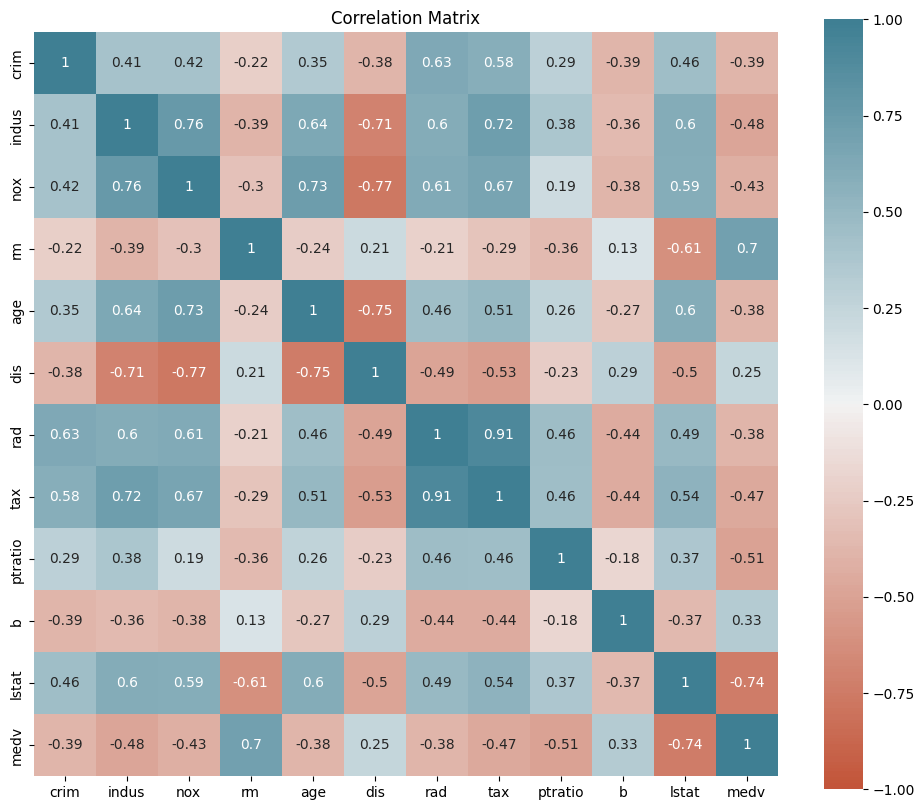

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr() # Pearson Correlation

plt.figure(figsize=(12, 10))

# Heatmap
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

plt.title('Correlation Matrix')

plt.show()

In [331]:
X = df.iloc[:,0:-2] 
y = df.iloc[:,-1]


In [332]:
X.shape,y.shape


((506, 10), (506,))

In [300]:
X = df.drop(columns='medv')
y = df['medv']


In [333]:
X

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,b
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99
502,0.04527,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90
503,0.06076,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90
504,0.10959,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45


In [302]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [303]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [304]:
model = LinearRegression()
model.fit(X_train, y_train) #Training the model

LinearRegression()

In [305]:
model.intercept_

38.13255199517276

In [306]:
model.coef_

array([-9.16666618e-02, -7.02824387e-03, -1.38684311e+01,  3.77928338e+00,
       -4.48110206e-04, -1.18824388e+00,  3.24323893e-01, -1.25618232e-02,
       -1.09994734e+00,  9.46129876e-03, -6.22336002e-01])

In [307]:
model.predict(X_test)

array([22.32119935, 20.28360655, 32.06105391,  9.09420817, 22.31683889,
       22.13078382, 40.50479696, 37.27278681, 14.53503133, 16.78597748,
       38.0826676 ,  8.10831737, 15.16427939, 25.19816054, 30.3900893 ,
       19.45310319, 16.25796394, 16.70842268, 27.72254782, 22.94730913,
       17.97272683, 13.52785553, 18.57941474, 13.44516099, 17.54889431,
       32.86947228, 26.37575023, 31.27947931, 18.35984772, 24.51194414,
       30.01028284, 38.90613304, 30.90238379, 19.52368293,  1.30970553,
       22.99324812, 32.763842  , 18.1503347 , 22.25159004, 39.50122841,
       -1.38785473, 22.29416238, 22.58541467, 26.00202355, 31.01537092,
       27.05883045, 39.58157761, 29.41925692, 21.76988453, 20.84450675,
       29.43249381, 17.19019561, 29.40341649, 21.41503341, 31.10364684,
       19.84210774, 23.54439411,  4.13933324, 20.96087965, 25.52172326,
       21.15289239, 19.94696268, 26.38457047, 18.03716432, 21.16692856,
       16.43378038, 20.68613003, 26.98675739, 12.3632506 , 16.33

In [308]:
#Test the model
y_pred  = model.predict(X_test)
print(y_pred )# printing predictions

[22.32119935 20.28360655 32.06105391  9.09420817 22.31683889 22.13078382
 40.50479696 37.27278681 14.53503133 16.78597748 38.0826676   8.10831737
 15.16427939 25.19816054 30.3900893  19.45310319 16.25796394 16.70842268
 27.72254782 22.94730913 17.97272683 13.52785553 18.57941474 13.44516099
 17.54889431 32.86947228 26.37575023 31.27947931 18.35984772 24.51194414
 30.01028284 38.90613304 30.90238379 19.52368293  1.30970553 22.99324812
 32.763842   18.1503347  22.25159004 39.50122841 -1.38785473 22.29416238
 22.58541467 26.00202355 31.01537092 27.05883045 39.58157761 29.41925692
 21.76988453 20.84450675 29.43249381 17.19019561 29.40341649 21.41503341
 31.10364684 19.84210774 23.54439411  4.13933324 20.96087965 25.52172326
 21.15289239 19.94696268 26.38457047 18.03716432 21.16692856 16.43378038
 20.68613003 26.98675739 12.3632506  16.33156974 23.72061573 28.69727691
 38.49346557 13.1503107  13.10482285 24.23254989 29.42309678 -0.31778855
 15.28190036 20.22035828 21.90078017 29.29166905 25

In [309]:
confronto = pd.DataFrame(list(zip(y_pred,y_test)), columns=['predetti','reali'])
confronto

,predetti,reali
0,22.321199,18.7
1,20.283607,18.5
2,32.061054,29.8
3,9.094208,9.7
4,22.316839,21.7
...,...,...
122,31.046962,24.0
123,1.218068,14.4
124,29.595408,36.2
125,11.452703,11.8


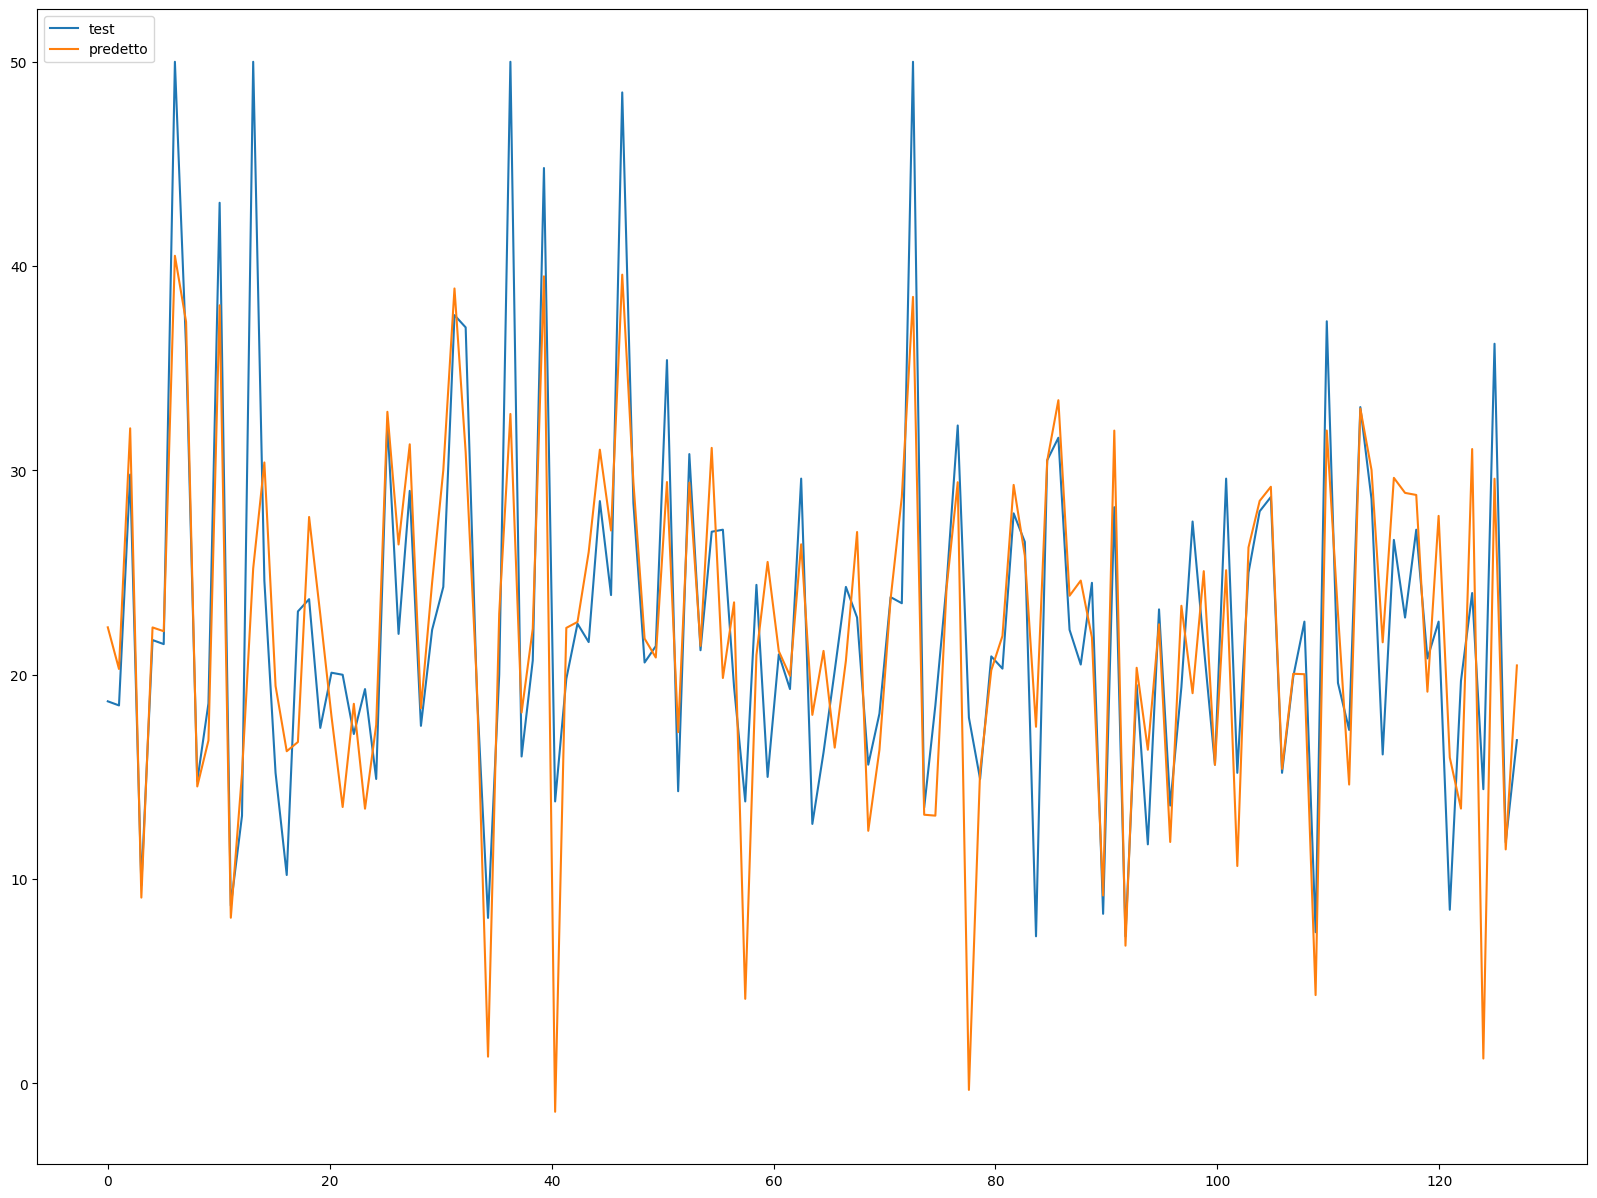

In [310]:
import numpy as np
length = y_pred.shape[0] # 30 
x = np.linspace(0,length,length)


plt.figure(figsize=(20,15))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2);

In [311]:
correlmat = df.corr()
correlmat.index.values

array(['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'], dtype=object)

In [312]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i,index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns=['Correlated Value'])
    return df

In [313]:
threshold_corr = 0.5
c_value = getCorrelatedFeature(correlmat['medv'], threshold_corr)
c_value

,Correlated Value
rm,0.695360
ptratio,-0.507787
lstat,-0.737663
medv,1.000000


In [314]:
df_ridotta = df[c_value.index]
df_ridotta

,rm,ptratio,lstat,medv
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
...,...,...,...,...
501,6.593,21.0,9.67,22.4
502,6.120,21.0,9.08,20.6
503,6.976,21.0,5.64,23.9
504,6.794,21.0,6.48,22.0


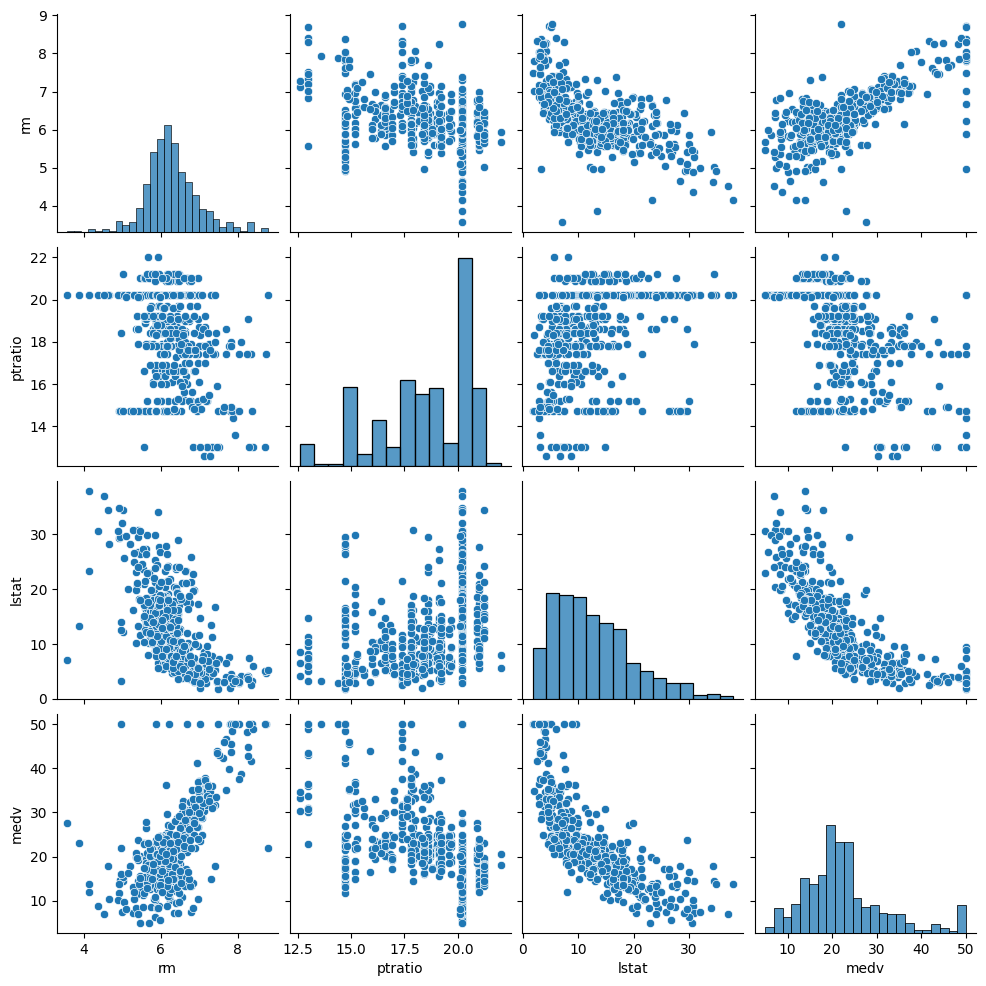

In [315]:
sns.pairplot(df_ridotta)

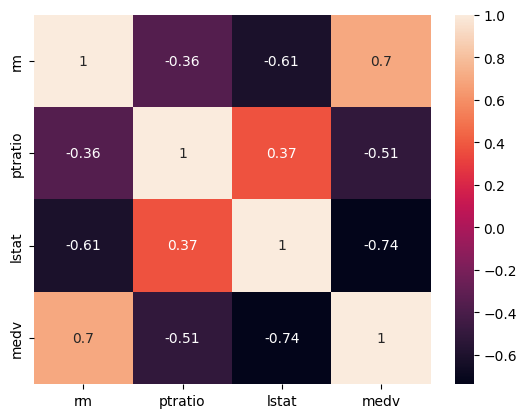

In [316]:
sns.heatmap(df_ridotta.corr(), annot=True);

In [317]:
X = df_ridotta.drop(columns=['medv'])
y = df_ridotta['medv']


In [318]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 667
                                                    )

In [319]:

model_slim = LinearRegression()
model_slim.fit(X_train, y_train)


LinearRegression()

In [320]:
y_pred = model_slim.predict(X_test)

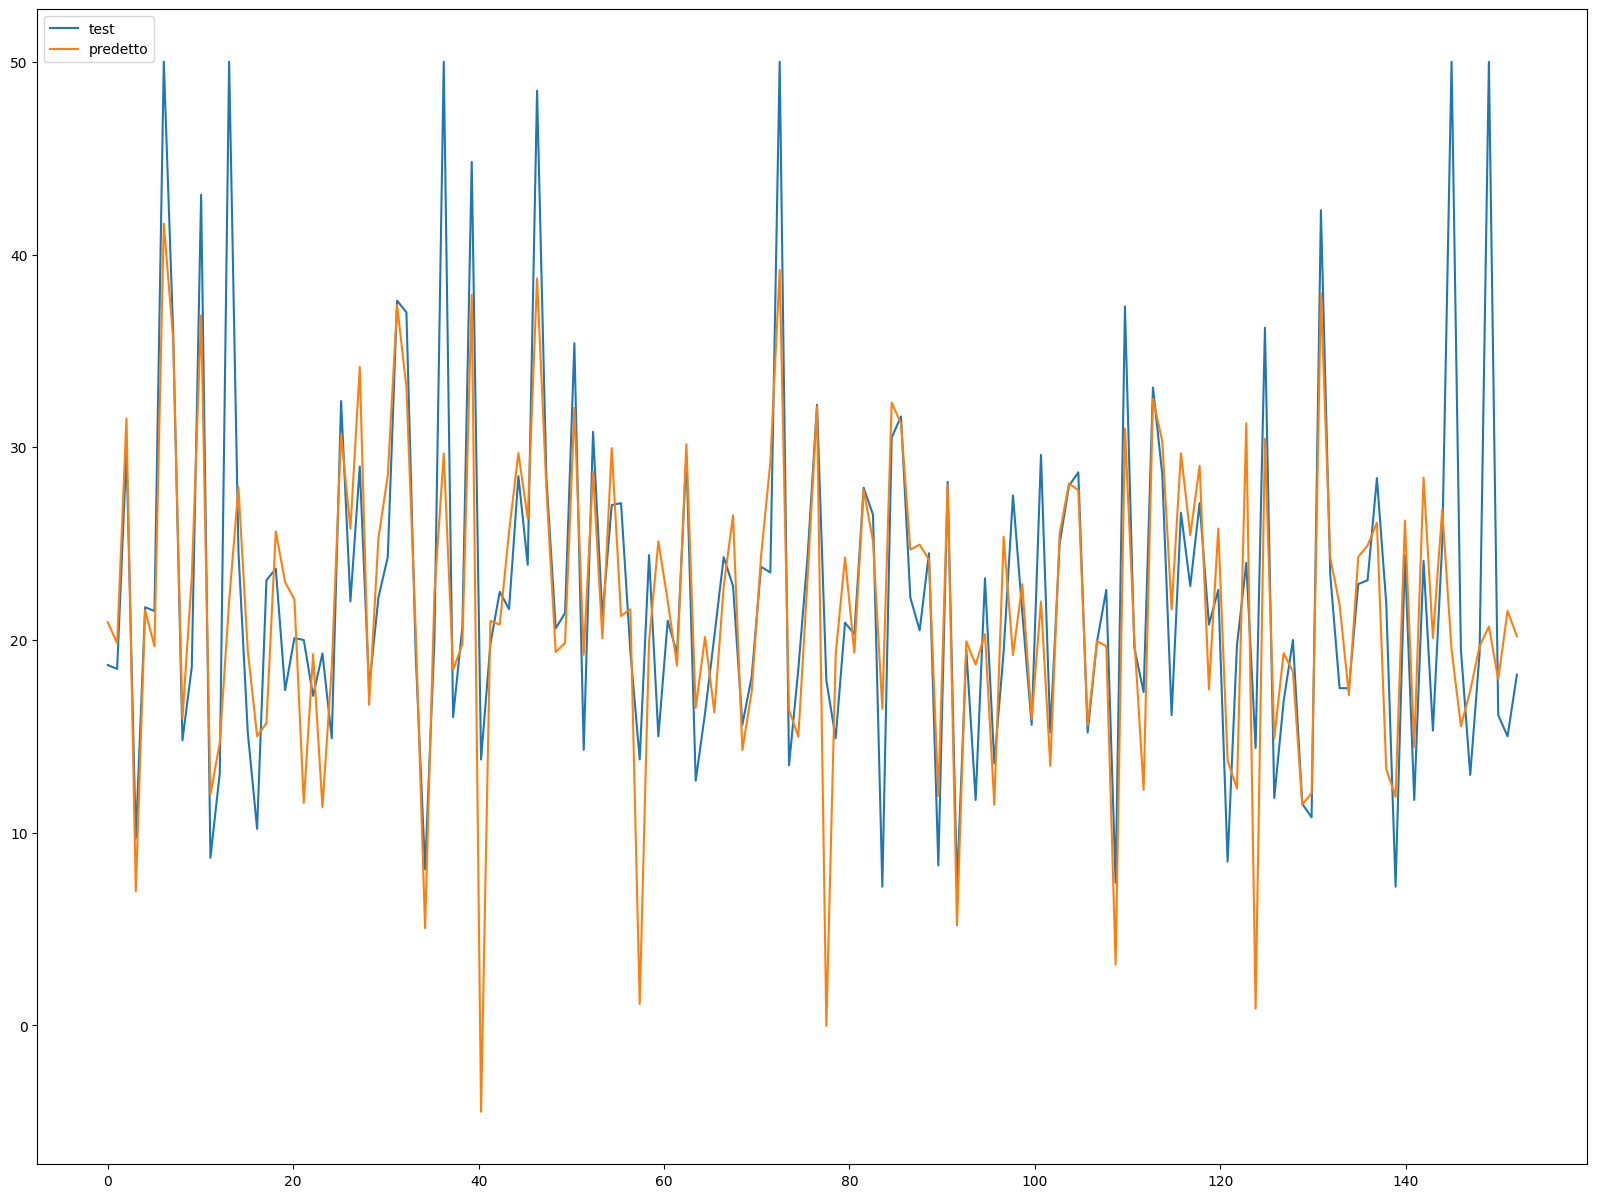

In [321]:
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)

plt.figure(figsize=(20,15))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2);

In [322]:

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('R2_score: ', round(r2score,4))
print('MAE: ', round(mae,2))
print('MSE: ', round(mse,2))
print('RMSE: ', round(rmse,2))

R2_score:  0.5388
MAE:  4.06
MSE:  40.92
RMSE:  6.4


In [323]:

import joblib

In [324]:

##per salvare il modello
joblib.dump(model_slim,'regrex_prova_input.pkl')


['regrex_prova_input.pkl']

In [325]:
loaded_model = joblib.load('regrex_prova_input.pkl')
loaded_model

LinearRegression()

In [334]:
df_ridotta.columns.to_list()

['rm', 'ptratio', 'lstat', 'medv']

In [345]:
ndf = df_ridotta.drop('medv', axis=1)

In [346]:
selected_columns =ndf.columns.to_list()

In [347]:
X = ndf[selected_columns]  
X = X.astype(float)  
X = X.set_axis(selected_columns, axis=1) 

In [348]:
test = X.iloc[0:1].values[0].tolist()
test

[6.575, 15.3, 4.98]

In [349]:
res = loaded_model.predict([test])[0]

round(res,2)


c:\Users\ifoa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.25

In [350]:
loaded_model.intercept_

17.20087771159354

In [351]:
beta ={
        'variable' : X.columns.to_list(),
        'weight':loaded_model.coef_.tolist()
        }
tab = pd.DataFrame(beta)
tab

,variable,weight
0,rm,4.890739
1,ptratio,-0.997123
2,lstat,-0.573507


In [ ]:
df.to_csv('case.csv', index=False)